<a href="https://colab.research.google.com/github/mtuan8820/learnNLP/blob/main/text_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
sentences = [
    'I like eggs and ham',
    'I love chocolate and bunnies',
    'I hate onions'
]

In [5]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [6]:
print(sequences)

[[1, 3, 4, 2, 5], [1, 6, 7, 2, 8], [1, 9, 10]]


In [7]:
tokenizer.word_index

{'i': 1,
 'and': 2,
 'like': 3,
 'eggs': 4,
 'ham': 5,
 'love': 6,
 'chocolate': 7,
 'bunnies': 8,
 'hate': 9,
 'onions': 10}

In [8]:
data = pad_sequences(sequences)
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 0  0  1  9 10]]


In [9]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 0  0  1  9 10]]


In [10]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 1  9 10  0  0]]


CBOW

In [11]:
import gensim.downloader as api
dataset = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,anarchism,originated,as,a,term,of,abuse,first,used,against,...,pointing,out,objects,of,interest,lack,of,social,or,emotional
1,reciprocity,qualitative,impairments,in,communication,as,manifested,by,at,least,...,armor,for,him,from,hephaestus,the,goddess,athena,provides,him
2,with,the,aegis,of,zeus,when,he,goes,to,the,...,from,the,balcony,to,the,stage,below,breaking,his,leg
3,despite,his,injury,booth,managed,to,limp,to,his,horse,...,short,film,best,sound,mixing,one,nine,three,zero,to
4,present,best,sound,editing,one,nine,six,three,to,present,...,london,independent,the,sociology,of,the,ayn,rand,cult,by


In [14]:
df.shape

(1701, 10000)

In [15]:
vocab_size = 20_000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dataset)
sequences = tokenizer.texts_to_sequences(dataset)

In [16]:
tokenizer.num_words

20000

In [17]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'and': 3,
 'one': 4,
 'in': 5,
 'a': 6,
 'to': 7,
 'zero': 8,
 'nine': 9,
 'two': 10,
 'is': 11,
 'as': 12,
 'eight': 13,
 'for': 14,
 's': 15,
 'five': 16,
 'three': 17,
 'was': 18,
 'by': 19,
 'that': 20,
 'four': 21,
 'six': 22,
 'seven': 23,
 'with': 24,
 'on': 25,
 'are': 26,
 'it': 27,
 'from': 28,
 'or': 29,
 'his': 30,
 'an': 31,
 'be': 32,
 'this': 33,
 'which': 34,
 'at': 35,
 'he': 36,
 'also': 37,
 'not': 38,
 'have': 39,
 'were': 40,
 'has': 41,
 'but': 42,
 'other': 43,
 'their': 44,
 'its': 45,
 'first': 46,
 'they': 47,
 'some': 48,
 'had': 49,
 'all': 50,
 'more': 51,
 'most': 52,
 'can': 53,
 'been': 54,
 'such': 55,
 'many': 56,
 'who': 57,
 'new': 58,
 'used': 59,
 'there': 60,
 'after': 61,
 'when': 62,
 'into': 63,
 'american': 64,
 'time': 65,
 'these': 66,
 'only': 67,
 'see': 68,
 'may': 69,
 'than': 70,
 'world': 71,
 'i': 72,
 'b': 73,
 'would': 74,
 'd': 75,
 'no': 76,
 'however': 77,
 'between': 78,
 'about': 79,
 'over': 80,
 'years':

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Embedding, Lambda, Input
from tensorflow.keras.models import Model

In [19]:
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [20]:
context_size = 10
embedding_didm = 50

i = Input(shape = (context_size,))
x = Embedding(vocab_size, embedding_didm)(i)
x = Lambda(lambda t: tf.reduce_mean(t, axis = 1))(x)
x = Dense(vocab_size, use_bias = False)(x)

model = Model(i, x)


In [21]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 10, 50)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20000)               │       1,000,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 2,000,000 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
half_context_size = context_size//2
def data_generator(sequences, batch_size = 128):
  X_batch = np.zeros((batch_size, context_size))
  Y_batch = np.zeros(batch_size)
  n_batches = int(np.ceil(len(sequences)/batch_size))

  while True:
    random.shuffle(sequences)

    for i in range(n_batches):
      batch_sequences = sequences[i*batch_size: (i+1)*batch_size]
      current_batch_size = len(batch_sequences)
      for ii in range(current_batch_size):
        seq = batch_sequences[ii]
        j = np.random.randint(0, len(seq)-context_size-1)
        x1 = seq[j:j+half_context_size]
        x2 = seq[j+half_context_size+1:j+context_size+1]
        X_batch[ii, :half_context_size] = x1
        X_batch[ii, half_context_size:] = x2
        y = seq[j+half_context_size]
        Y_batch[ii] = y
      yield X_batch[:current_batch_size], Y_batch[:current_batch_size]


In [23]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [24]:
batch_size = 16
r = model.fit(
    data_generator(sequences, batch_size = batch_size),
    epochs = 2000,
    steps_per_epoch = int(np.ceil(len(sequences)/batch_size)),
    verbose = 1
)

Epoch 1/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.0410 - loss: 9.8976
Epoch 2/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.0701 - loss: 9.5305
Epoch 3/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.0636 - loss: 8.2786
Epoch 4/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0555 - loss: 7.8135
Epoch 5/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0824 - loss: 7.7366
Epoch 6/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.0679 - loss: 7.6316
Epoch 7/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.0615 - loss: 7.4876
Epoch 8/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.0577 - loss: 7.8570
Epoch 9/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.0799 - loss: 7.5189
Epoch 10/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0741 - loss: 7.5132
Epoch 11/2000
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.0635 - loss: 7.6776
Epoch 12/2000
107/1

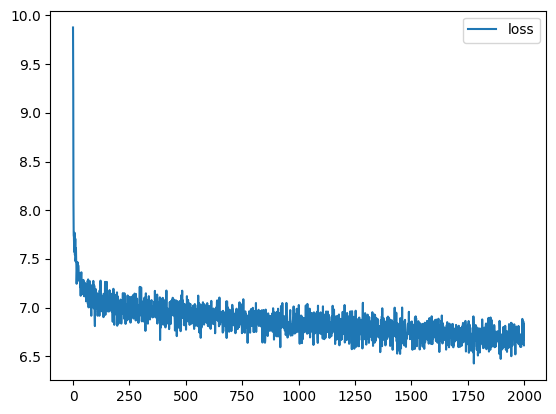

In [25]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

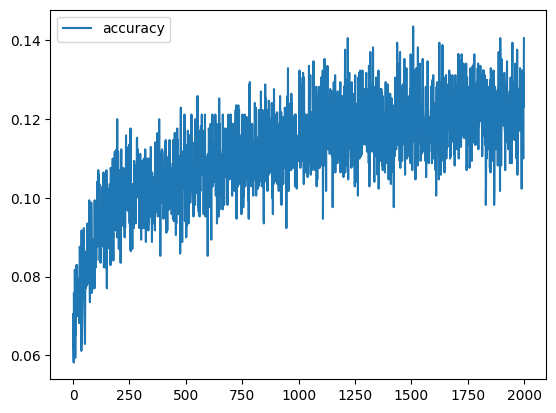

In [26]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.legend()

In [27]:
embeddings = model.layers[1].get_weights()[0]
embeddings

array([[-0.02410002,  0.03624469,  0.04384006, ...,  0.02396232,
         0.04405816,  0.04269155],
       [ 0.22382775,  0.00531918,  0.04255672, ..., -0.07088143,
        -0.33815956,  0.2854822 ],
       [-0.02825657,  0.3482112 ,  0.10826271, ...,  0.390445  ,
         0.8985702 , -0.01112369],
       ...,
       [-0.17425968, -0.28400666, -0.17517543, ..., -0.06912204,
        -0.00475469, -0.35851887],
       [-0.23542196,  0.02180402,  0.08454303, ..., -0.00819122,
        -0.25591826, -0.26505527],
       [-0.38059223,  0.04901101, -0.08017912, ..., -0.30663985,
        -0.15850404, -0.03678741]], dtype=float32)

In [28]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree')
neighbours.fit(embeddings)

NearestNeighbors(algorithm='ball_tree')

In [30]:
queen_idx = tokenizer.word_index['queen']
queen = embeddings[queen_idx:queen_idx+1]
distances, indices = neighbours.kneighbors(queen)
indices

array([[ 903,  757, 2032, 3879, 5607]])

In [31]:
for idx in indices[0]:
  word = tokenizer.index_word[idx]
  print(word)

queen
lord
elizabeth
augustus
grandson


In [34]:
def print_neighbors(query):
  query_idx = tokenizer.word_index[query]
  query = embeddings[query_idx:query_idx+1]
  distances, indices = neighbours.kneighbors(query)
  for idx in indices[0]:
    word = tokenizer.index_word[idx]
    print(word)

In [35]:
print_neighbors('king')

king
pope
elizabeth
edward
emperor


In [36]:
print_neighbors('uncle')

uncle
grandfather
cousin
resignation
grandson


In [38]:
def get_embedding(word):
  idx = tokenizer.word_index[word]
  return embeddings[idx:idx+1]

king = get_embedding('king')
man = get_embedding('man')
woman = get_embedding('woman')
query = king - man + woman

distances, indices = neighbours.kneighbors(query)
for idx in indices[0]:
  word = tokenizer.index_word[idx]
  print(word)

king
pope
emperor
prince
elizabeth
